<a href="https://colab.research.google.com/github/RolandoOrtizB/Bootcamp/blob/main/Ejercicio_distancias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df_iris = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Calcular el promedio de las medidas de las flores de cada especie
promedios = df_iris.groupby('species').mean()
print(promedios)

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


In [ ]:
df_iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
# Calcular la distancia Manhattan y euclidiana entre cada par de promedios
dist_manhattan = np.zeros((3, 3))
dist_euclidean = np.zeros((3, 3))

for i in range(3):
    for j in range(3):
        dist_manhattan[i, j] = np.sum(np.abs(promedios.iloc[i] - promedios.iloc[j]))
        dist_euclidean[i, j] = np.sqrt(np.sum((promedios.iloc[i] - promedios.iloc[j])**2))

# Mostrar las distancias
print("Distancias Manhattan:")
print(dist_manhattan)
print("\nDistancias Euclidianas:")
print(dist_euclidean)

Distancias Manhattan:
[[0.    5.456 7.896]
 [5.456 0.    2.848]
 [7.896 2.848 0.   ]]

Distancias Euclidianas:
[[0.         3.20517457 4.75259171]
 [3.20517457 0.         1.62048882]
 [4.75259171 1.62048882 0.        ]]


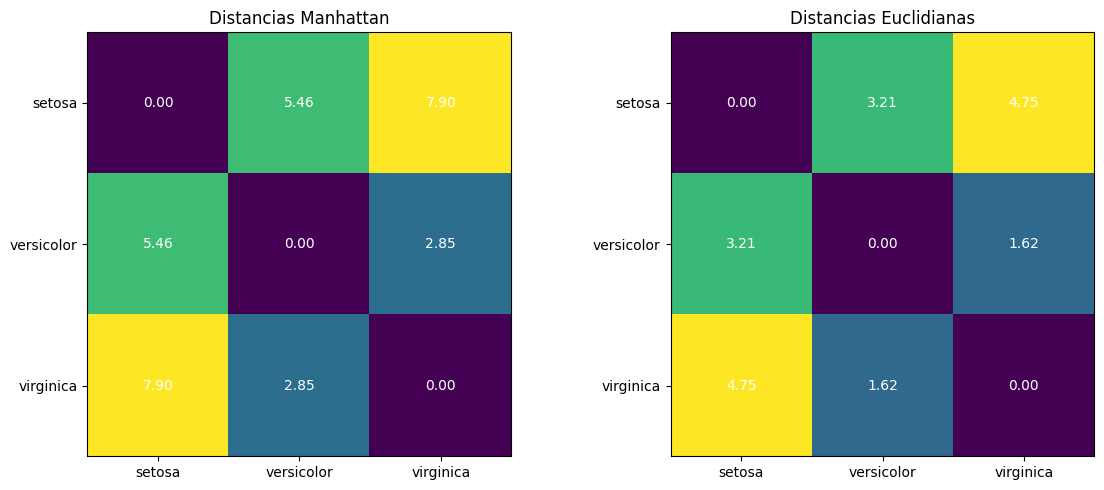

In [ ]:
# Graficar las distancias
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(dist_manhattan, cmap='viridis', interpolation='nearest')
axs[0].set_title('Distancias Manhattan')
axs[0].set_xticks(np.arange(3))
axs[0].set_yticks(np.arange(3))
axs[0].set_xticklabels(promedios.index)
axs[0].set_yticklabels(promedios.index)
for i in range(3):
    for j in range(3):
        axs[0].text(j, i, f'{dist_manhattan[i, j]:.2f}', ha='center', va='center', color='w')

axs[1].imshow(dist_euclidean, cmap='viridis', interpolation='nearest')
axs[1].set_title('Distancias Euclidianas')
axs[1].set_xticks(np.arange(3))
axs[1].set_yticks(np.arange(3))
axs[1].set_xticklabels(promedios.index)
axs[1].set_yticklabels(promedios.index)
for i in range(3):
    for j in range(3):
        axs[1].text(j, i, f'{dist_euclidean[i, j]:.2f}', ha='center', va='center', color='w')

plt.tight_layout()
plt.show()